### "Momepy" Multiple Centrality Assessment (MCA) : exemple d'Evreux

##### Sami Ramzi Chibane © 

##### L'évaluation de la centralité multiple "Multiple Centrality Assessment" (MCA) est une approche d'analyse du réseau routier développée par Porta et Latora (2006). Son objectif principal est de comprendre la structure des réseaux de rues de nos villes du point de vue de l'importance et de la position de chaque rue/intersection au sein de l'ensemble du réseau exprimée par diverses indices de centralité. "Momepy" permet d'effectuer tous les types d'analyses de centralité basées sur MCA, telles qu'elles ont été développées au fil des ans. Pour le contexte théorique, veuillez-vous référer aux travaux de Porta et al : http://docs.momepy.org/en/stable/references.html

##### Dans ce notebook l'exemple de la commune d'Evreux est développé à travers la mesure des différentes centralités et les représentations cartographiques associées à l'aide de "momepy". 

#### Multiple Centrality Assessment

In [4]:
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
streets_graph = ox.graph_from_place('Evreux, France', network_type='walk')
streets_graph = ox.projection.project_graph(streets_graph)

C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [5]:
edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

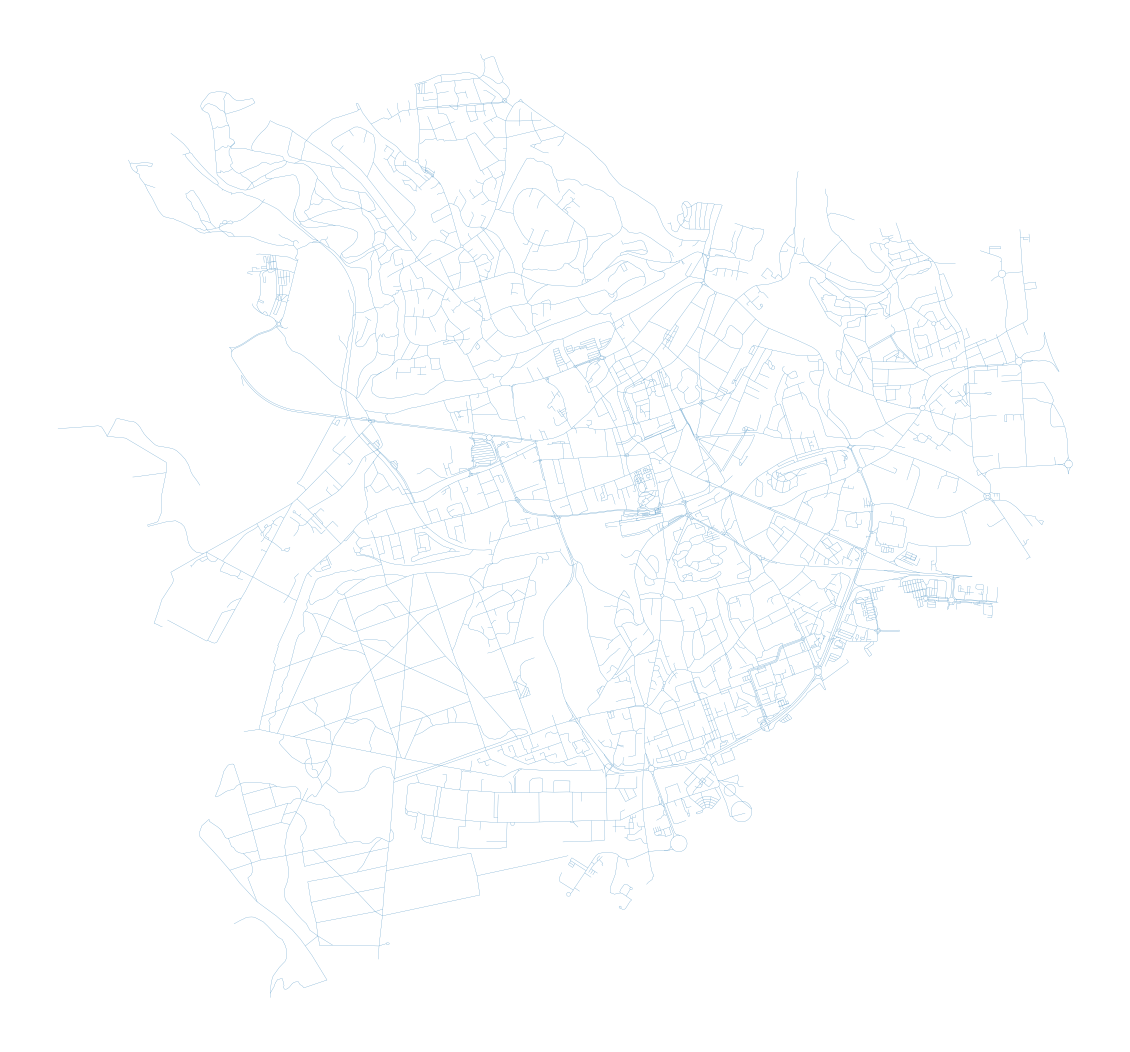

In [6]:
f, ax = plt.subplots(figsize=(20, 20))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

### Primal graph

In [10]:
primal = momepy.gdf_to_nx(edges, approach='primal')

#### Closeness centrality

#### Local closeness

In [11]:
primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_len', weight='mm_len')

  0%|          | 0/4357 [00:00<?, ?it/s]

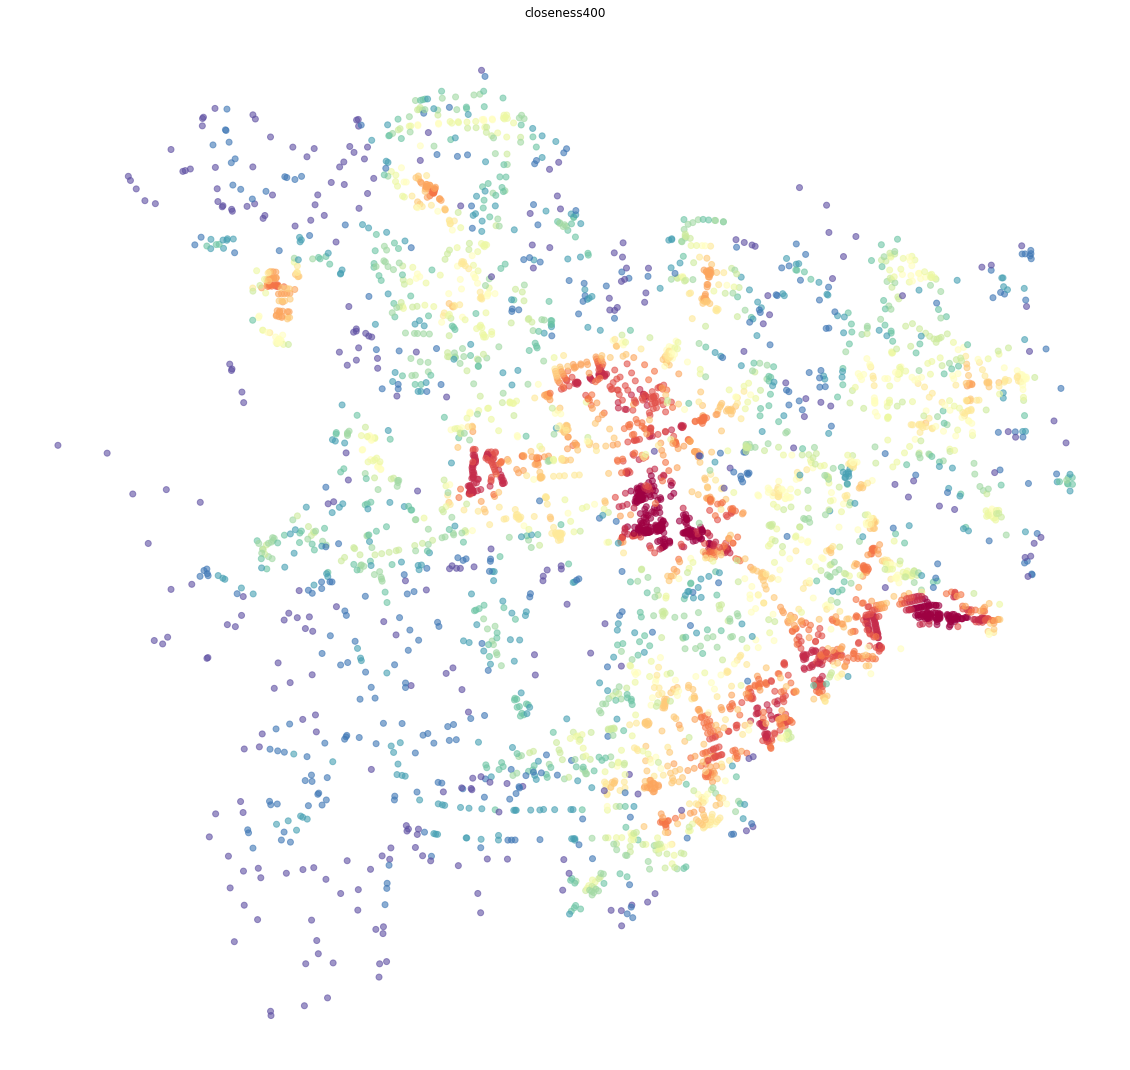

In [12]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400')
plt.show()

#### Global closeness

In [13]:
primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')

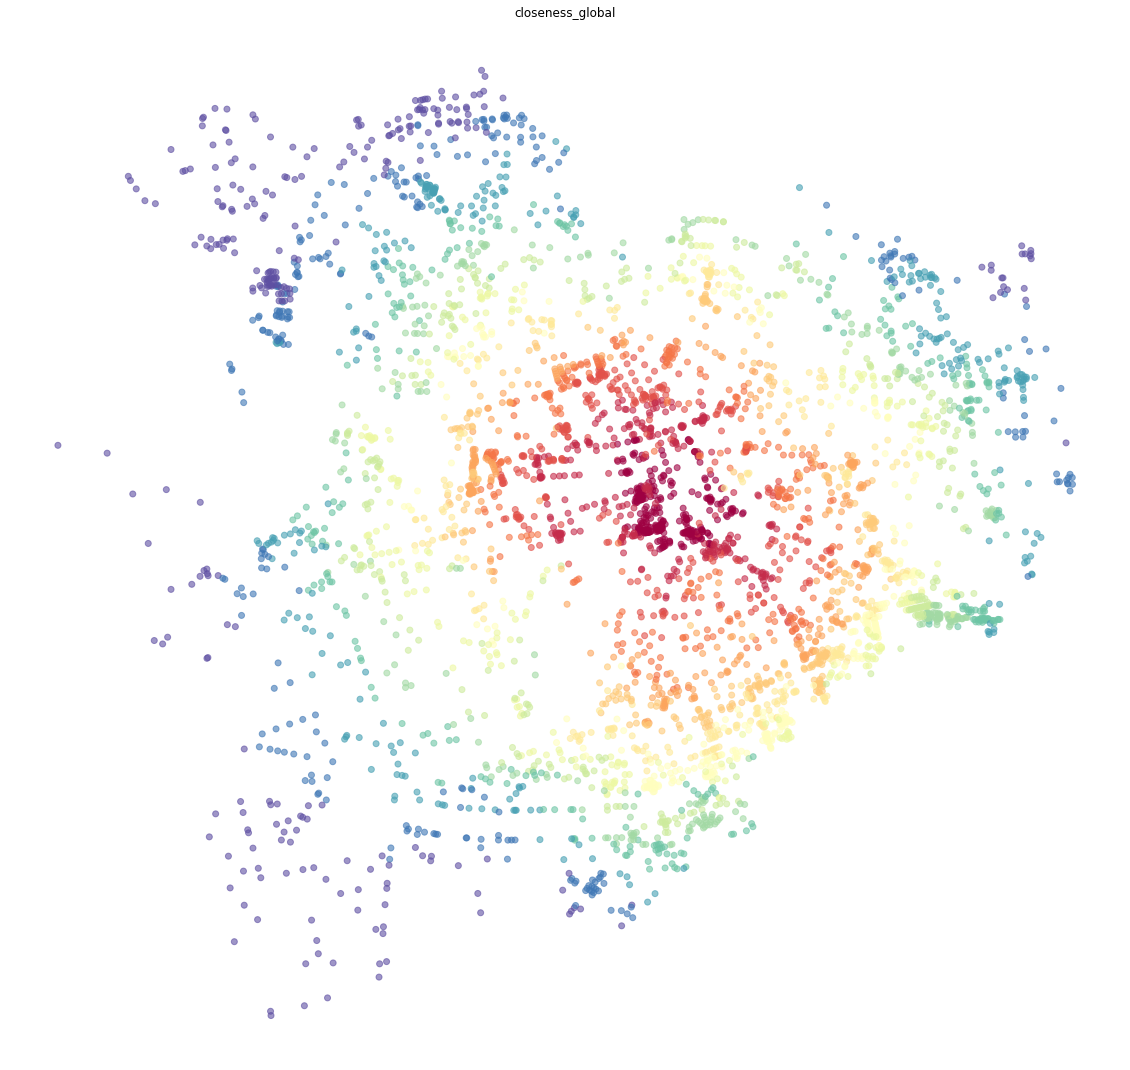

In [14]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness_global')
plt.show()

#### Betweenness

##### Node-based

In [15]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len')

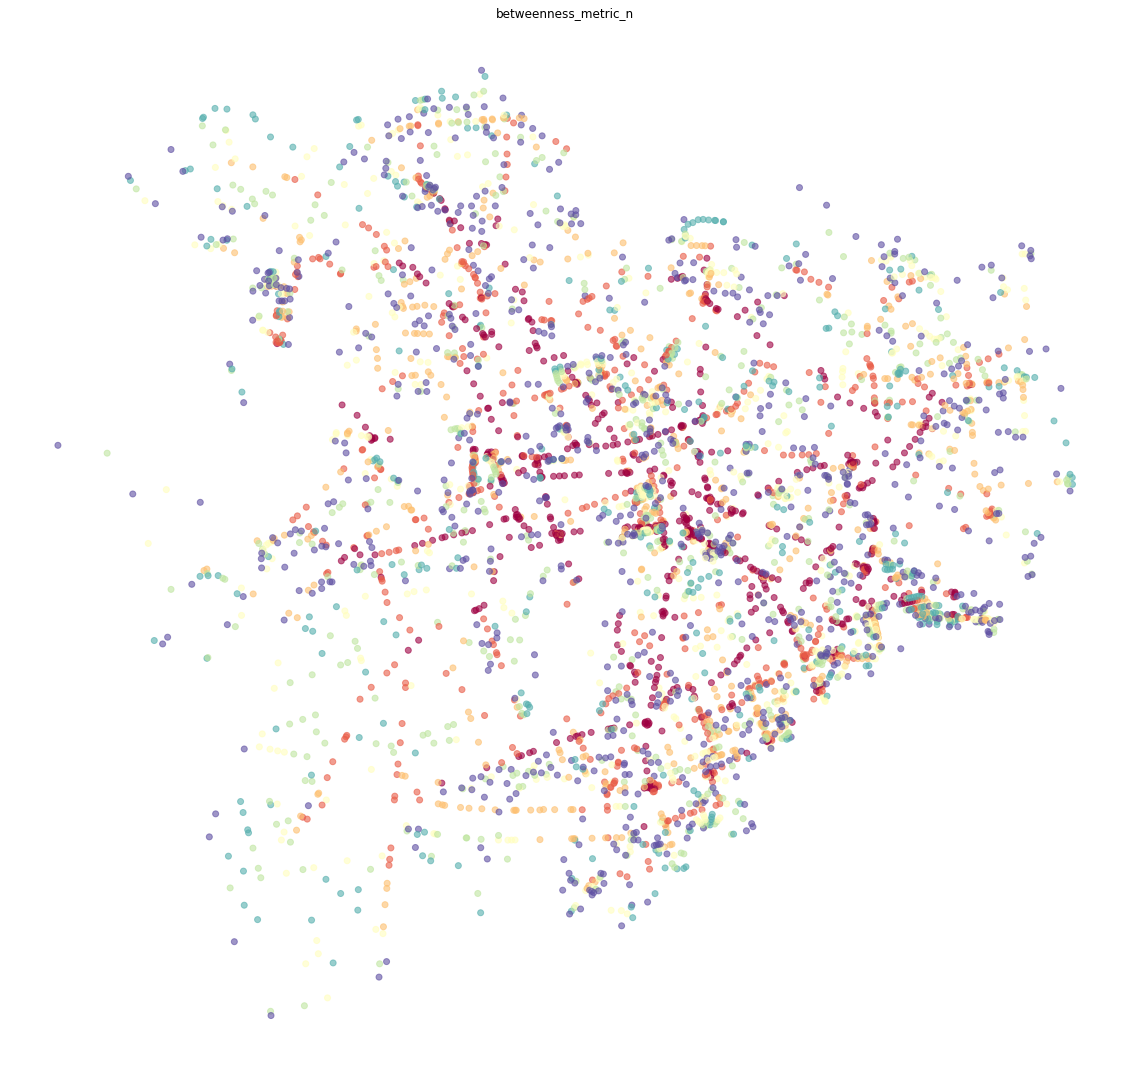

In [16]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=7, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweenness_metric_n')
plt.show()

##### Edge-based

In [17]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_e', mode='edges', weight='mm_len')

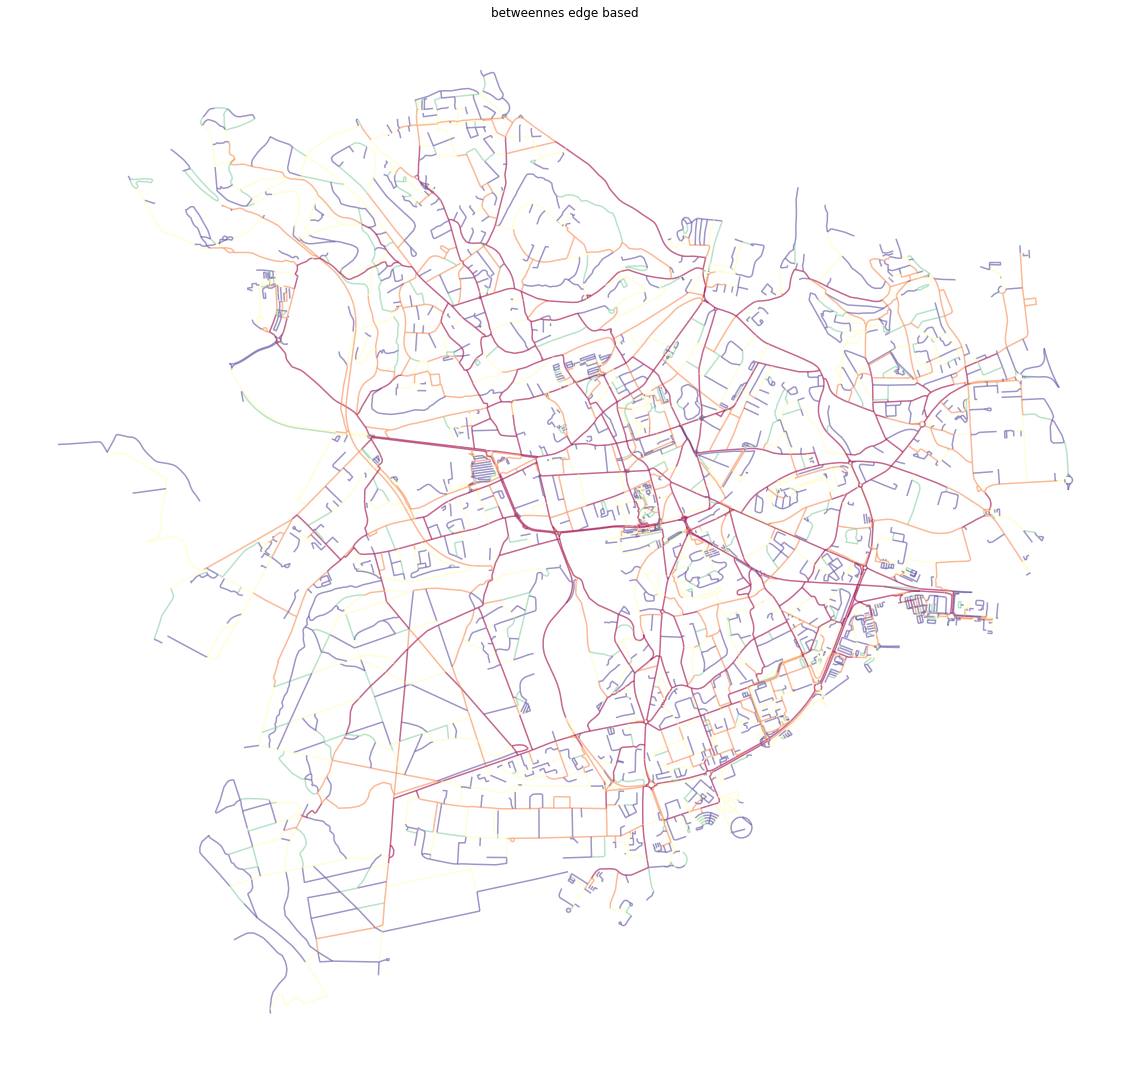

In [18]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)
f, ax = plt.subplots(figsize=(20, 20))
primal_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='Spectral_r', scheme='quantiles', alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes edge based')
plt.show()

##### Straightness

In [19]:
primal = momepy.straightness_centrality(primal)

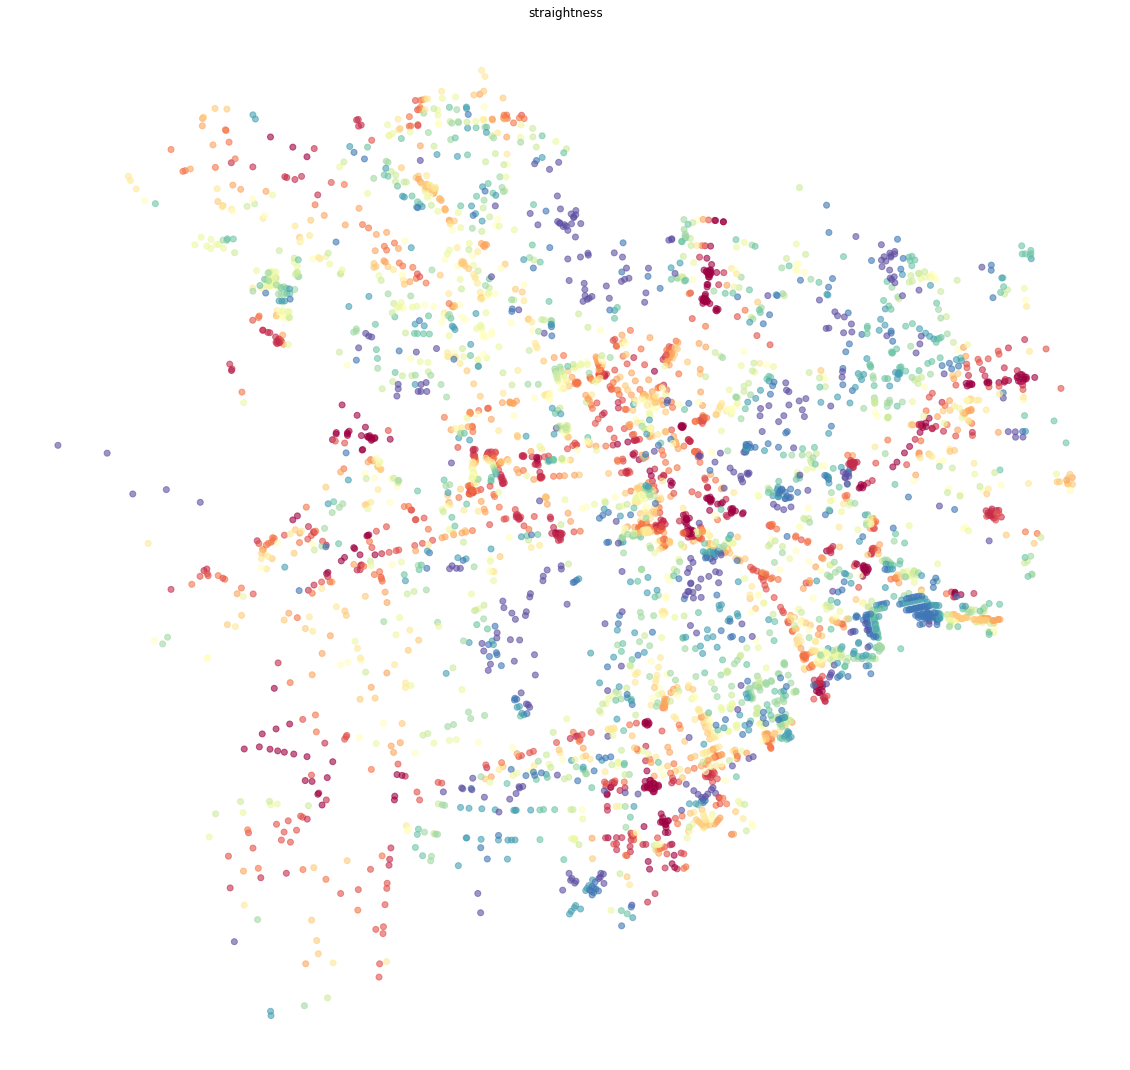

In [20]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='straightness', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('straightness')
plt.show()

##### Node values averaged onto edges

In [21]:
momepy.mean_nodes(primal, 'straightness')

In [22]:
momepy.mean_nodes(primal, 'closeness400')
momepy.mean_nodes(primal, 'closeness_global')
momepy.mean_nodes(primal, 'betweenness_metric_n')

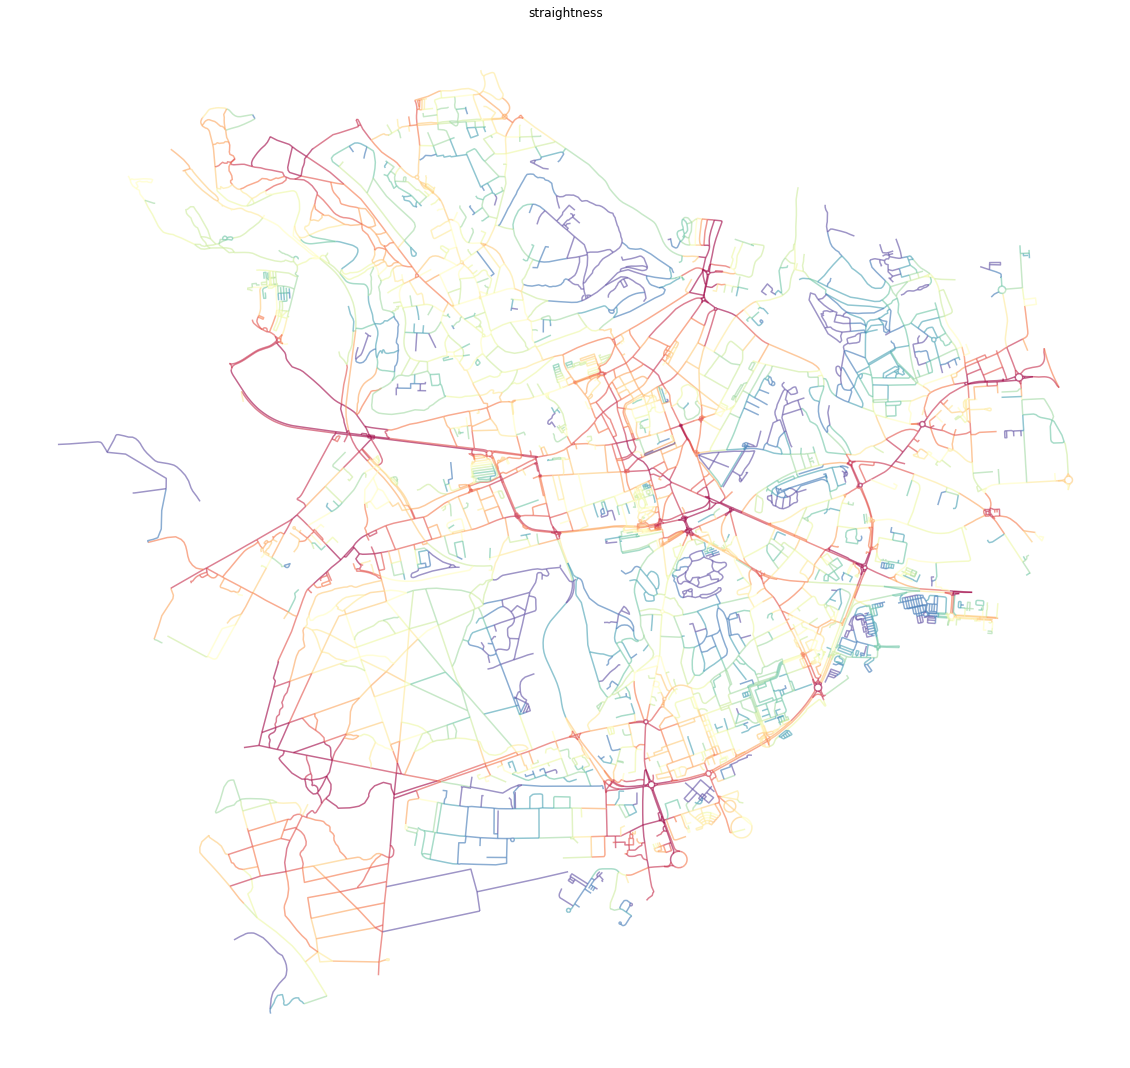

In [23]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)

f, ax = plt.subplots(figsize=(20, 20))
primal_gdf.plot(ax=ax, column='straightness', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('straightness')
plt.show()

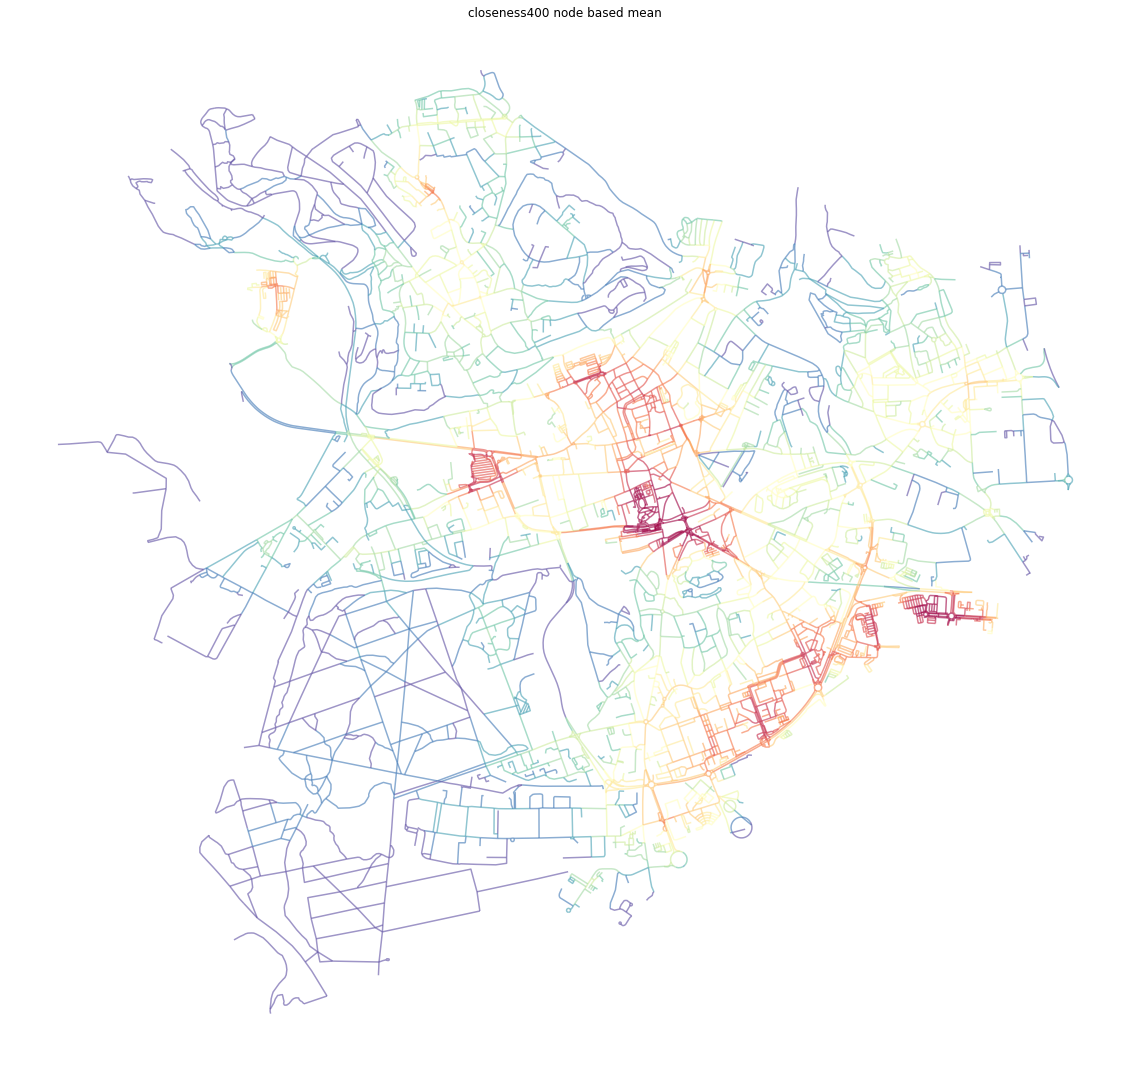

In [24]:
f, ax = plt.subplots(figsize=(20, 20))
primal_gdf.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400 node based mean')
plt.show()

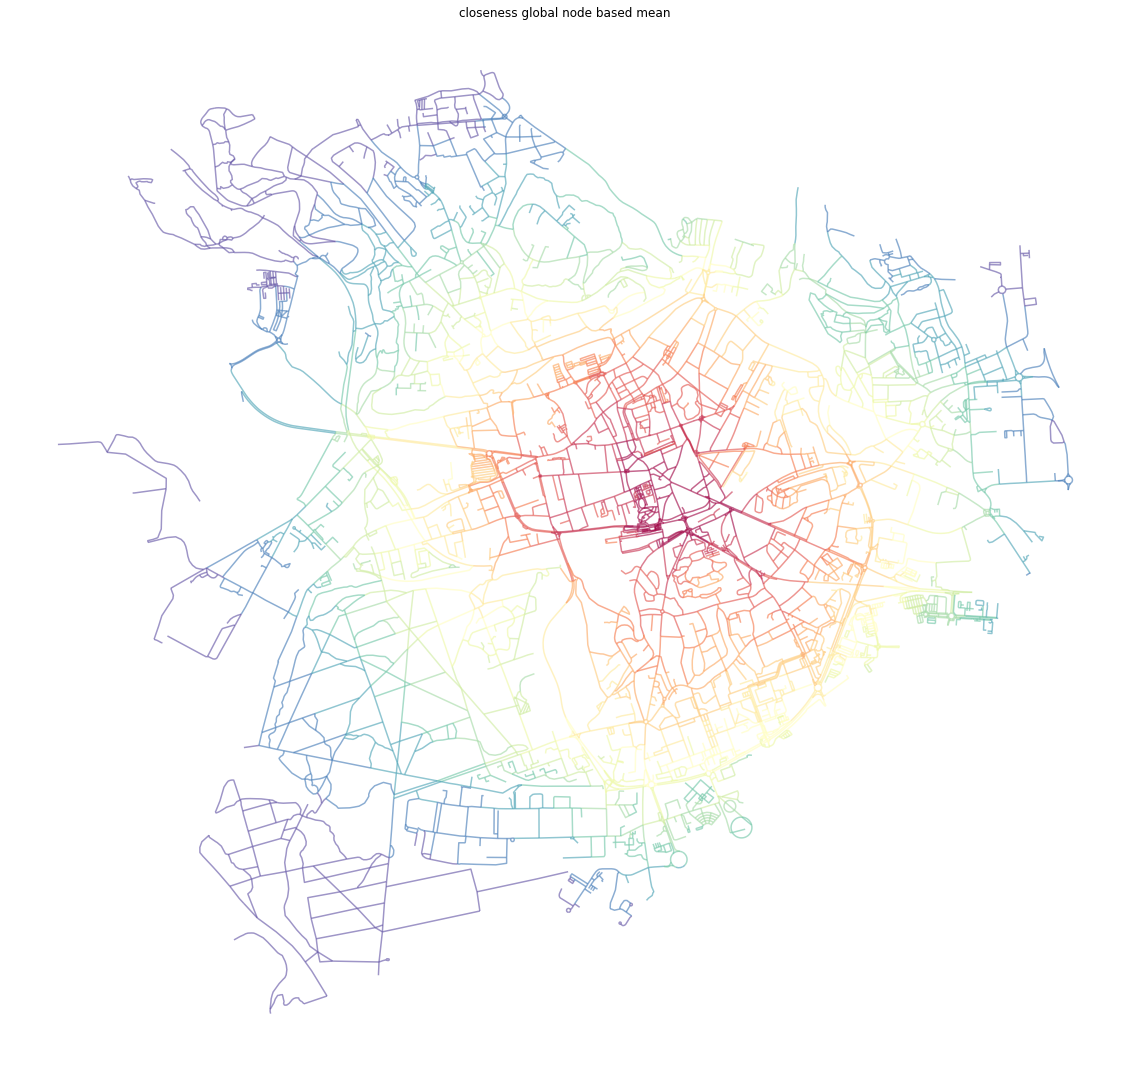

In [25]:
f, ax = plt.subplots(figsize=(20, 20))
primal_gdf.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness global node based mean')
plt.show()

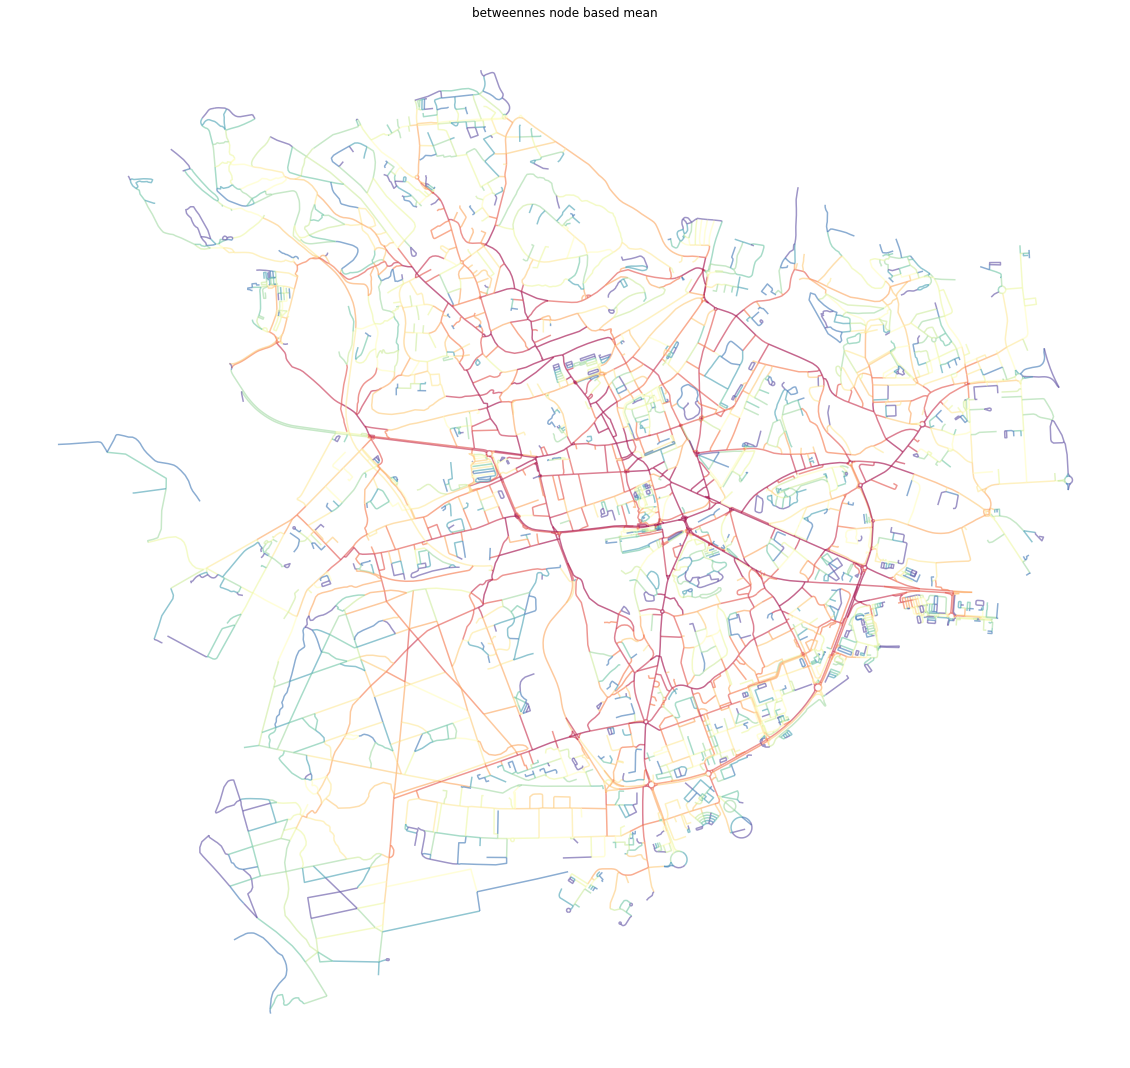

In [26]:
f, ax = plt.subplots(figsize=(20, 20))
primal_gdf.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes node based mean')
plt.show()

### Continuité dans les réseaux de rues "Continuity in street networks"
##### Momepy permet de déduire la continuité naturelle des réseaux de rues à l'aide de l'algorithme COINS. Le réseau routier est divisé en segments individuels et les angles de déviation entre les segments adjacents sont calculés. Les segments sont ensuite joints en traits continus. Les segments ne seront considérés comme faisant partie du même trait que si l'angle de déviation est supérieur au seuil (valeur par défaut à zéro). Dans le présent exemple, je vais dévelopepr le cas dur réseau pédestre de la ville de Montpellier en France.

In [27]:
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

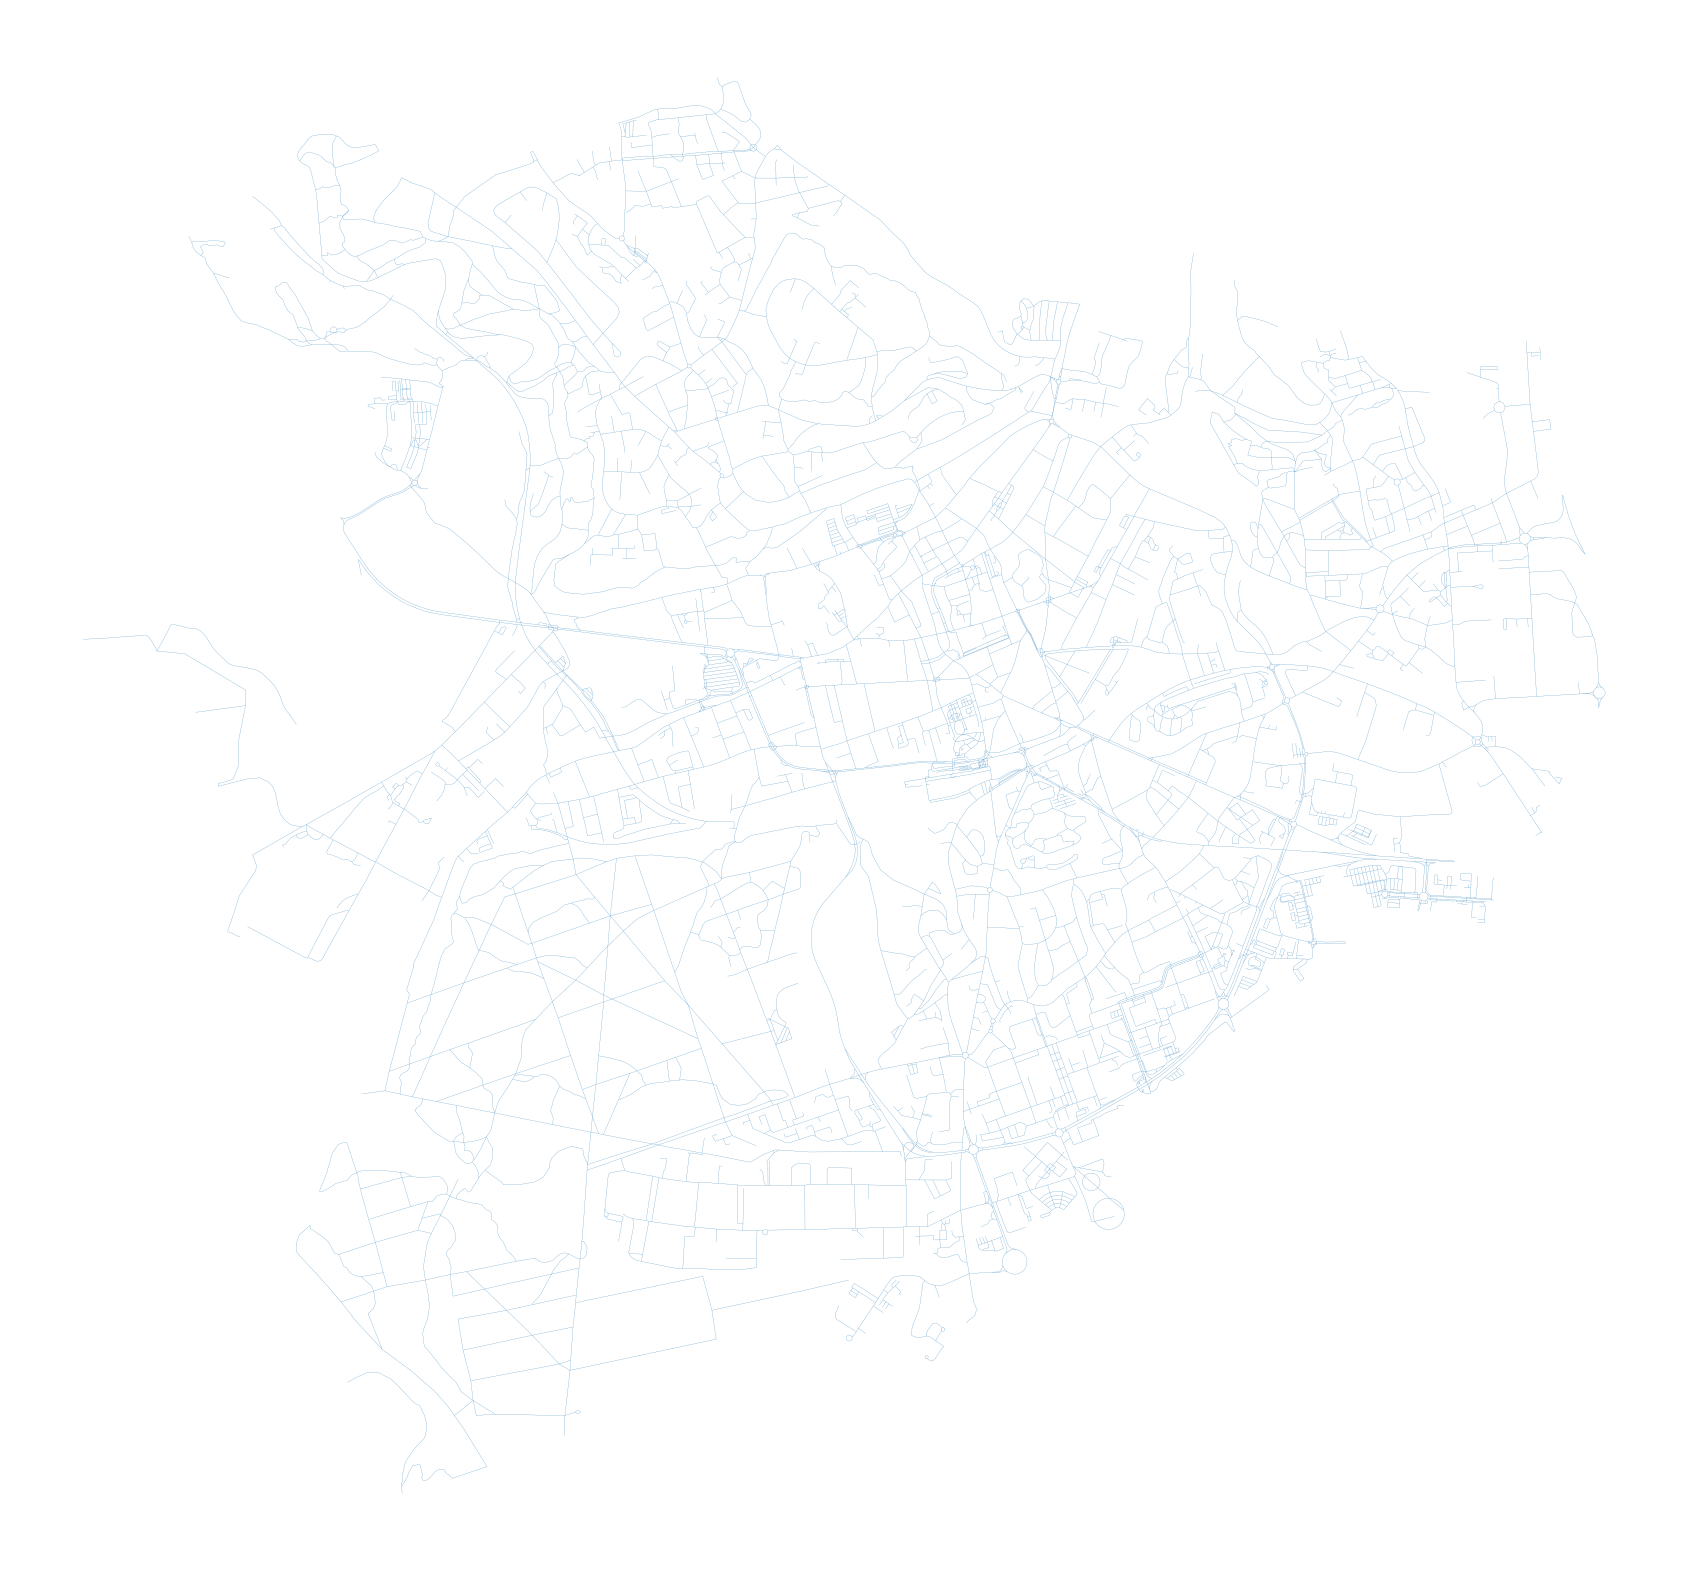

In [28]:
streets.plot(figsize=(30, 30), linewidth=0.2).set_axis_off()

In [29]:
continuity = momepy.COINS(streets)

In [30]:
stroke_gdf = continuity.stroke_gdf()

Text(0.5, 1.0, 'Continuité dans les réseaux de rues piétonnes de Montpellier')

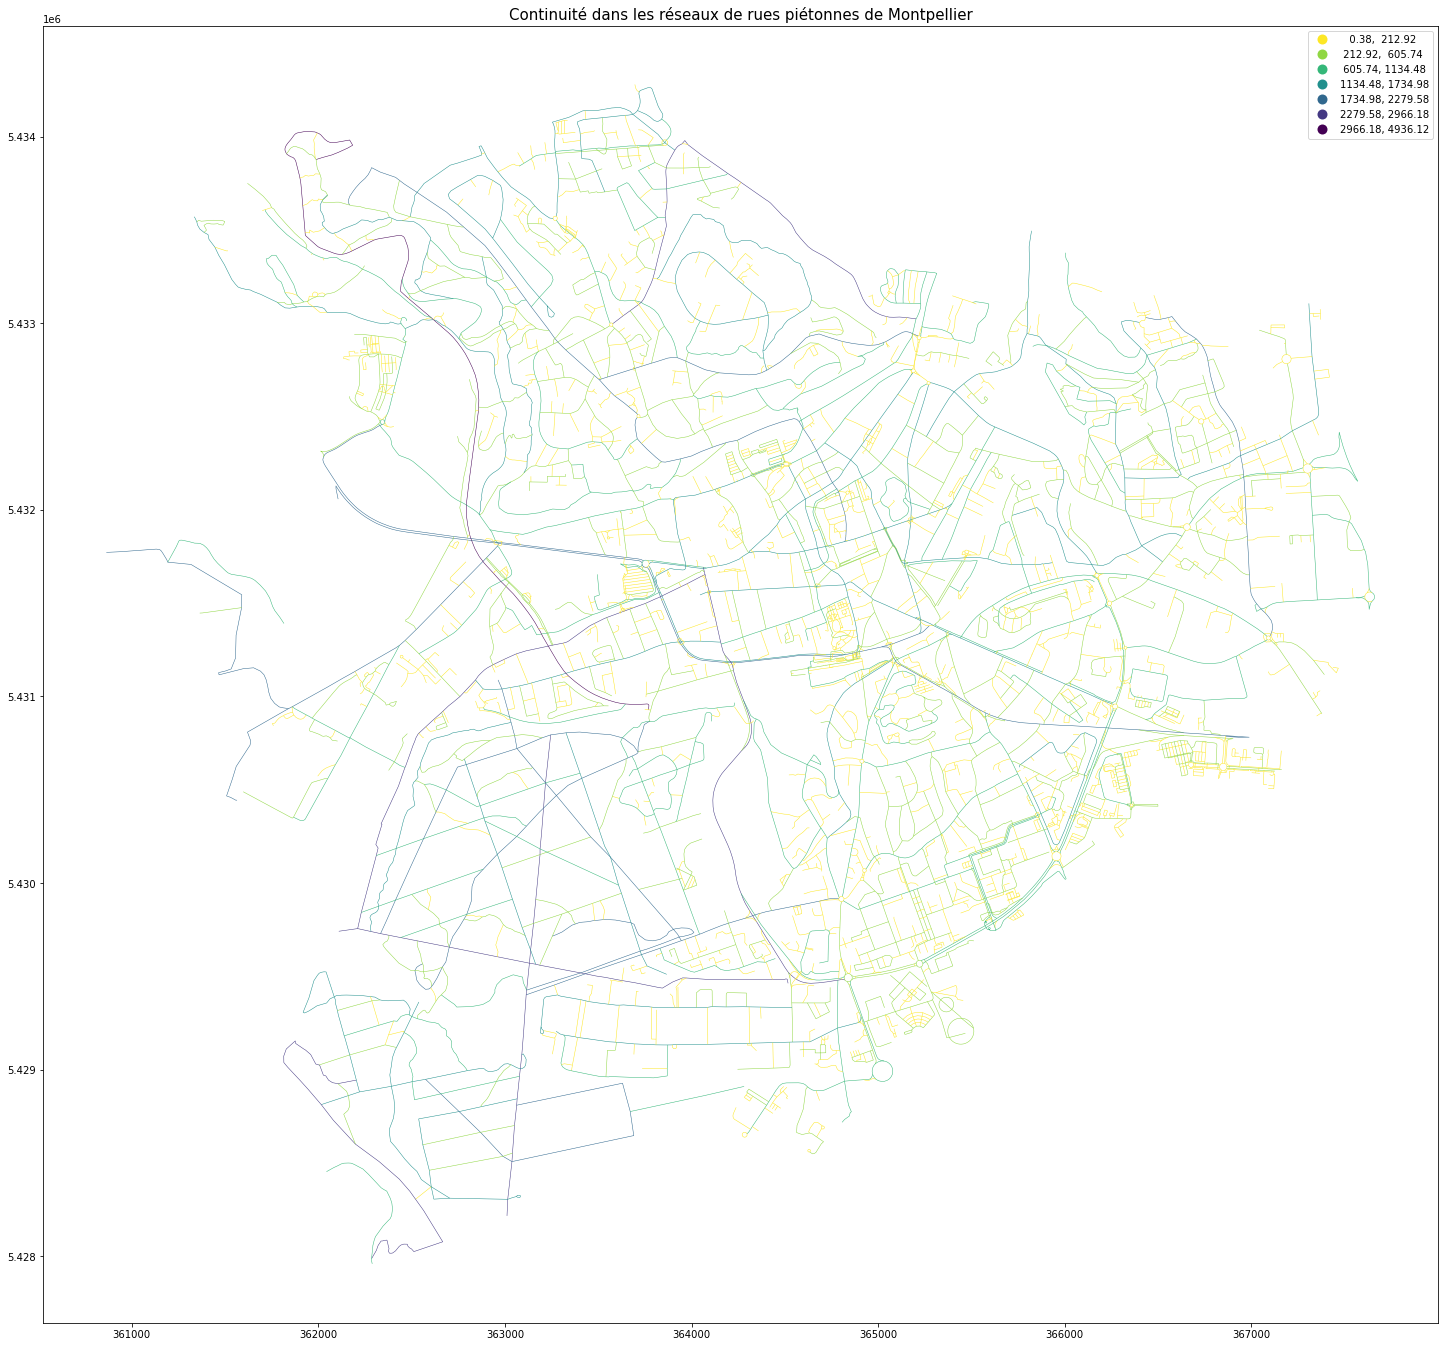

In [31]:
stroke_gdf.plot(stroke_gdf.length,
                figsize=(25, 25),
                cmap="viridis_r",
                linewidth=.5,
                legend=True,
                scheme="headtailbreaks"
               ).set_title("Continuité dans les réseaux de rues piétonnes de Montpellier", fontsize=15)

In [32]:
edg_lin = momepy.Linearity(edges)
edges['linearity'] = edg_lin.series

C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


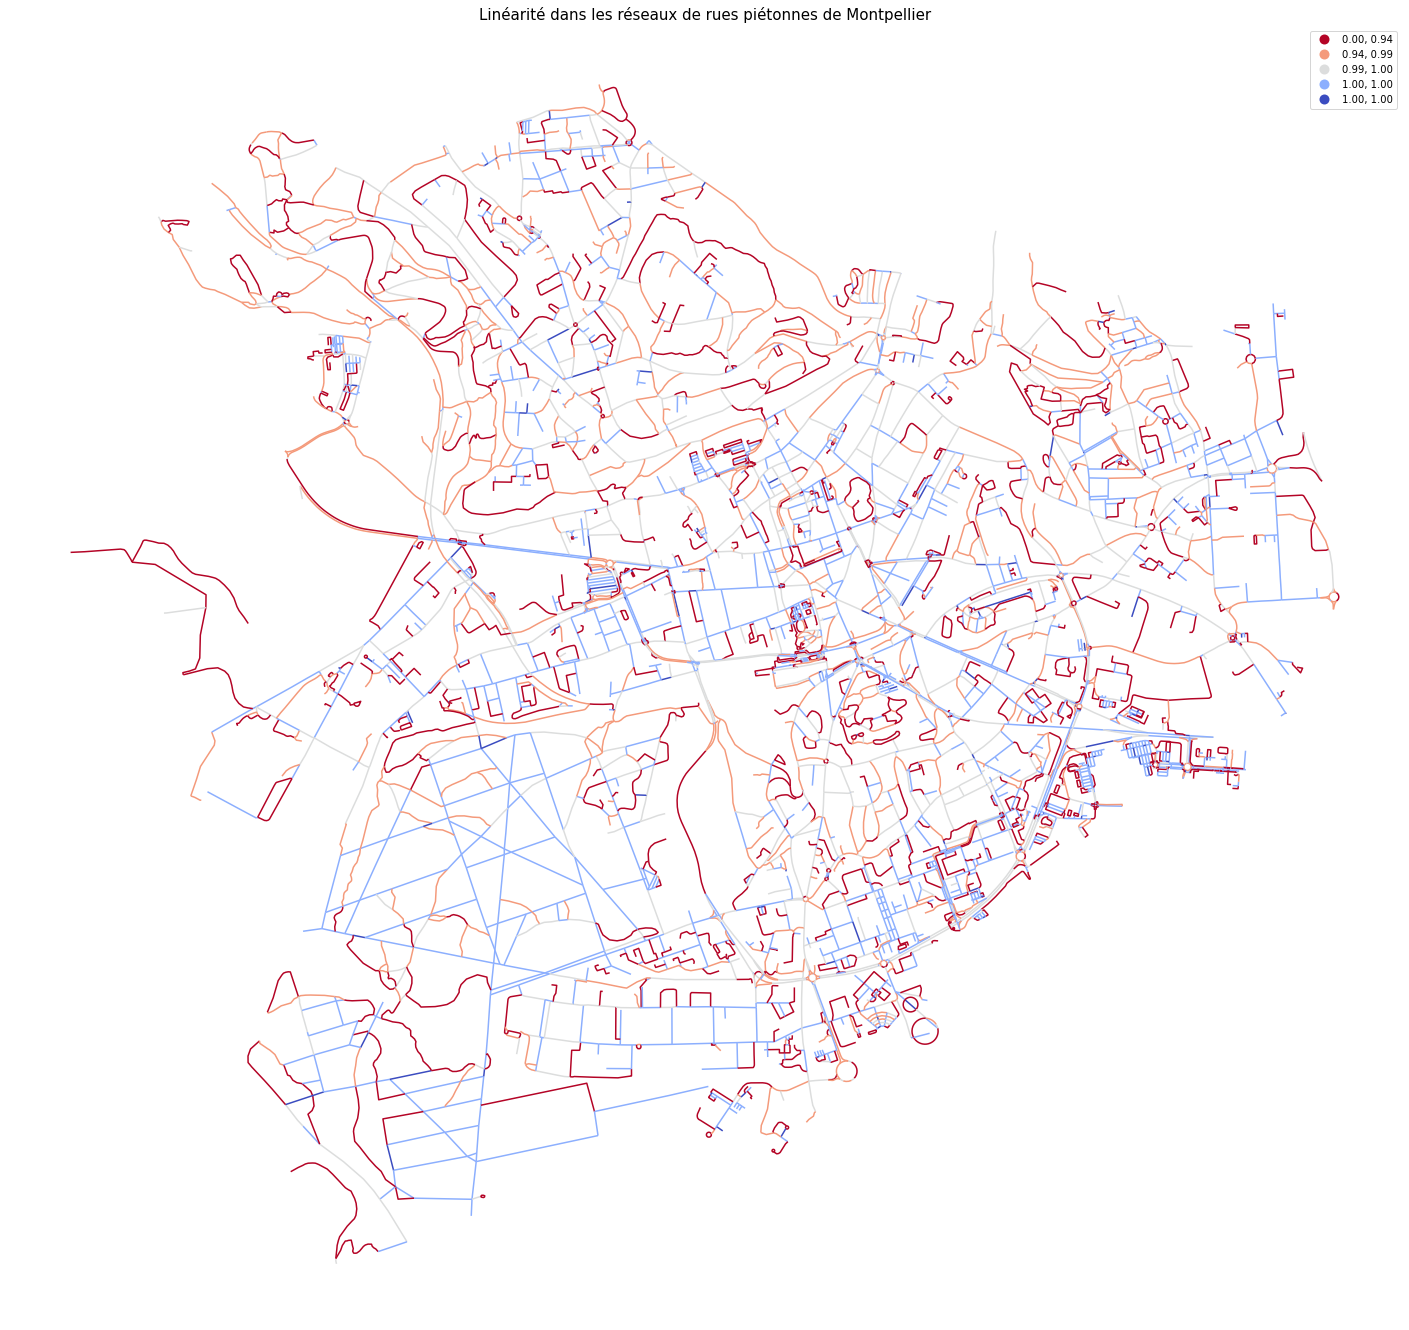

In [33]:
f, ax = plt.subplots(figsize=(25, 25))
edges.plot(ax=ax, column='linearity', legend=True, cmap='coolwarm_r', scheme='quantiles', k=6)
ax.set_axis_off()
ax.set_title("Linéarité dans les réseaux de rues piétonnes de Montpellier", fontsize=15)
plt.show()